In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'FEDFUNDS.csv'
data = pd.read_csv(file_path)

# Quick data inspection
data.info()

# Display first few rows
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      845 non-null    object 
 1   FEDFUNDS  845 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.3+ KB


,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


The dataset contains two columns:

DATE: The date of the observation.

FEDFUNDS: The Federal Funds Effective Rate.


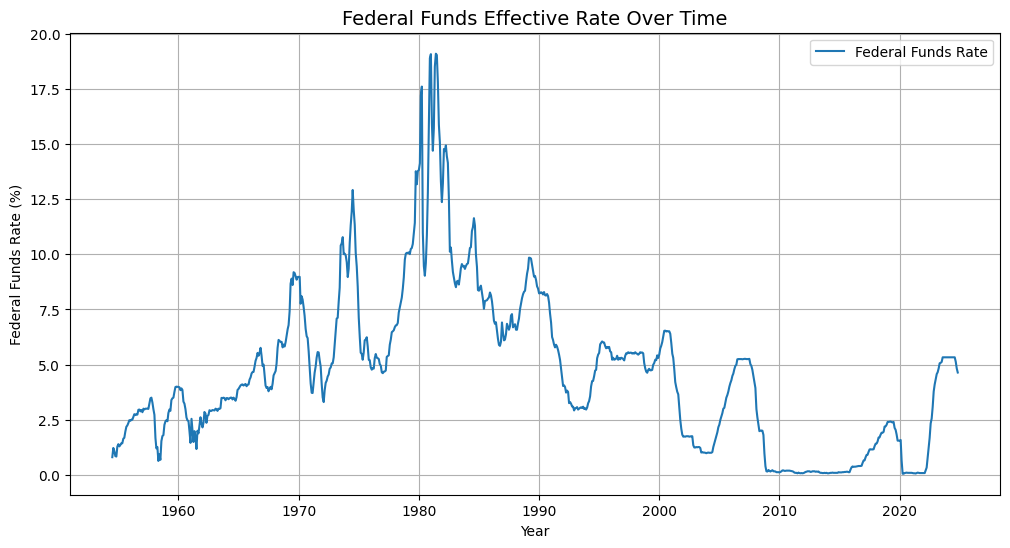

In [7]:
# Convert DATE to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Set DATE as index for better plotting and time-series analysis
data.set_index('DATE', inplace=True)

# Plot the Federal Funds Rate over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['FEDFUNDS'], label='Federal Funds Rate')
plt.title('Federal Funds Effective Rate Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Federal Funds Rate (%)')
plt.legend()
plt.grid()
plt.show()


### Observations on the Federal Funds Effective Rate Over Time

1. **Trends**: 
   - Clear long-term upward and downward trends are evident in the data.
2. **Seasonality**:
   - Certain periods display regular fluctuations, suggesting the presence of potential seasonality.
3. **Anomalies**:
   - Sharp spikes in the data are noticeable, likely corresponding to major economic events or policy changes.


### Step 2: Model Exploration and Selection

#### **Potential Models:**

1. **Classical Time-Series Models**:
   - **ARIMA (AutoRegressive Integrated Moving Average)**:
     - Effective for capturing linear trends and seasonality.
   - **Exponential Smoothing (ETS)**:
     - Captures seasonality and level effectively.

2. **Machine Learning Models**:
   - **Random Forests or Gradient Boosting**:
     - Leverage lag-based predictors for time-series features.
   - **Linear Regression**:
     - Utilizes extracted time-series features.

3. **Deep Learning Models**:
   - **LSTM (Long Short-Term Memory)**:
     - Well-suited for modeling long-term dependencies in the data.
   - **GRU (Gated Recurrent Units)**:
     - Similar to LSTM but more computationally efficient.
   - **Transformer Models**:
     - Exceptionally powerful for sequence modeling tasks.


In [11]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Check stationarity using Augmented Dickey-Fuller test
adf_test = adfuller(data['FEDFUNDS'])

# Print the ADF test result
adf_result = {
    'Test Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Used Lags': adf_test[2],
    'Number of Observations': adf_test[3],
    'Critical Values': adf_test[4],
}
adf_result


{'Test Statistic': np.float64(-2.9689577419026154),
 'p-value': np.float64(0.03789681600085018),
 'Used Lags': 17,
 'Number of Observations': 827,
 'Critical Values': {'1%': np.float64(-3.4382819390603068),
  '5%': np.float64(-2.865041182894659),
  '10%': np.float64(-2.568634324805645)}}

In [12]:
# Fit an ARIMA model (p=2, d=0, q=2 chosen as an example; will refine if needed)
model = ARIMA(data['FEDFUNDS'], order=(2, 0, 2))
arima_result = model.fit()

# Summary of the ARIMA model
arima_summary = arima_result.summary()
arima_summary


C:\Users\PURANJAY\anaconda3\envs\homework\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PURANJAY\anaconda3\envs\homework\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PURANJAY\anaconda3\envs\homework\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               FEDFUNDS   No. Observations:                  845
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -506.746
Date:                Mon, 02 Dec 2024   AIC                           1025.492
Time:                        18:02:51   BIC                           1053.928
Sample:                    07-01-1954   HQIC                          1036.387
                         - 11-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3740      1.953      2.240      0.025       0.547       8.201
ar.L1          1.0460      0.261      4.015      0.000       0.535       1.557
ar.L2         -0.0628      0.258     -0.244      0.807      -0.568       0.442
ma.L1          0.3926      0.259      1.513      0.130      -0.116       0.901
ma.L2          0.0279      0.114      0.245      0.807      -0.195       0.251
sigma2         0.1933      0.003     61.722      0.000       0.187       0.199
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            108932.59
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                            -2.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        58.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

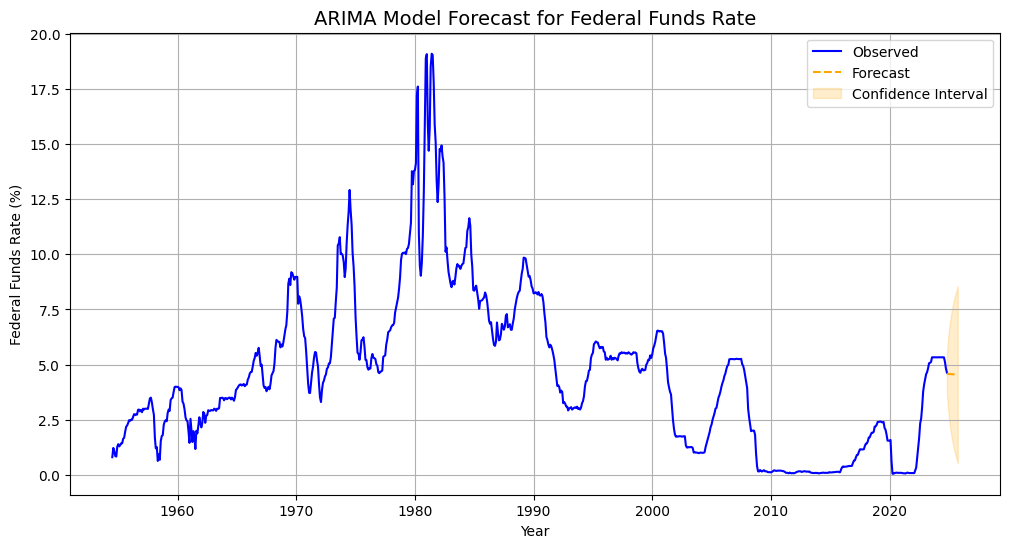

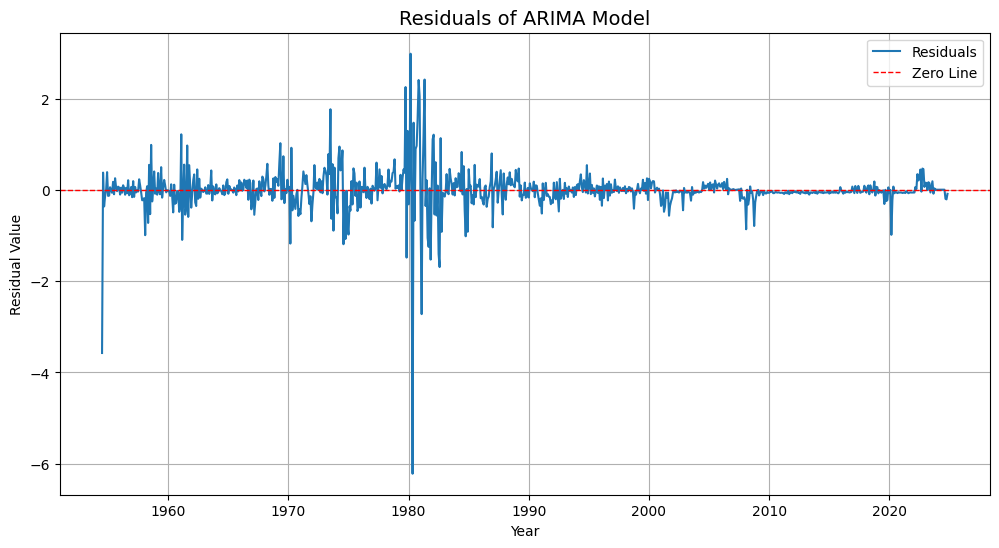

In [13]:
# Forecast using the fitted model
forecast = arima_result.get_forecast(steps=12)
forecast_index = pd.date_range(data.index[-1], periods=12, freq='MS')

# Extract forecast values and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['FEDFUNDS'], label='Observed', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='orange', linestyle='--')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], 
                 color='orange', alpha=0.2, label='Confidence Interval')
plt.title('ARIMA Model Forecast for Federal Funds Rate', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Federal Funds Rate (%)')
plt.legend()
plt.grid()
plt.show()

# Plot residuals
residuals = arima_result.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Zero Line')
plt.title('Residuals of ARIMA Model', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Residual Value')
plt.legend()
plt.grid()
plt.show()


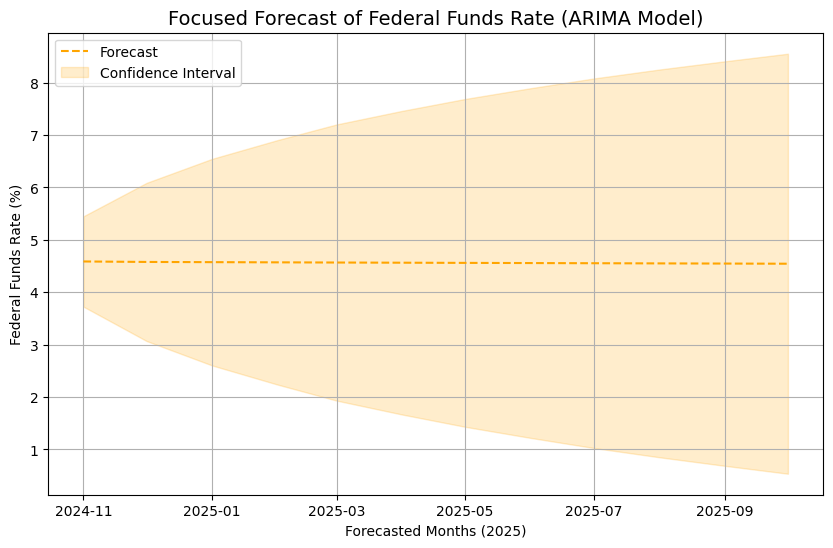

In [14]:
# Plot only the forecast with confidence intervals for better focus
plt.figure(figsize=(10, 6))
plt.plot(forecast_index, forecast_mean, label='Forecast', color='orange', linestyle='--')
plt.fill_between(forecast_index, forecast_ci['lower FEDFUNDS'], forecast_ci['upper FEDFUNDS'],
                 color='orange', alpha=0.2, label='Confidence Interval')
plt.title('Focused Forecast of Federal Funds Rate (ARIMA Model)', fontsize=14)
plt.xlabel('Forecasted Months (2025)')
plt.ylabel('Federal Funds Rate (%)')
plt.legend()
plt.grid()
plt.show()


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['FEDFUNDS'].values.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# Set sequence length
sequence_length = 12  # 12 months
X, y = create_sequences(scaled_data, sequence_length)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Forecast the next 4 months
n_forecast = 4
last_sequence = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)
forecasts = []

for _ in range(n_forecast):
    # Predict next value
    forecast_scaled = model.predict(last_sequence)
    forecasts.append(forecast_scaled[0, 0])
    
    # Append the prediction to the sequence and remove the oldest value
    last_sequence = np.append(last_sequence[:, 1:, :], [[forecast_scaled]], axis=1)

# Inverse transform the forecasts to original scale
forecasts = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

# Plot the forecast
forecast_dates = pd.date_range(start=data.index[-1], periods=n_forecast + 1, freq='MS')[1:]
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['FEDFUNDS'], label='Historical Data', color='blue')
plt.plot(forecast_dates, forecasts, label='Forecast', color='orange', linestyle='--', marker='o')
plt.title('LSTM Forecast for First 4 Months of 2025', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Federal Funds Rate (%)')
plt.legend()
plt.grid()
plt.show()


C:\Users\PURANJAY\anaconda3\envs\homework\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0523 - val_loss: 0.0049
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0106 - val_loss: 0.0026
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0055 - val_loss: 0.0017
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0056 - val_loss: 0.0016
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - val_loss: 0.0017
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0047 - val_loss: 0.0013
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0039 - val_loss: 0.0010
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041 - val_loss: 7.9347e-04
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - los

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

C:\Users\PURANJAY\anaconda3\envs\homework\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 0.0653 - val_loss: 0.0077
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0083 - val_loss: 0.0036
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0056 - val_loss: 0.0016
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - val_loss: 0.0016
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0051 - val_loss: 0.0014
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0048 - val_loss: 0.0017
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - val_loss: 0.0012
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0048 - val_loss: 0.0012
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0039 - val_loss: 0.0012
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0046 - val_loss: 0.0010
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - val_loss: 9.3312e-04
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss:

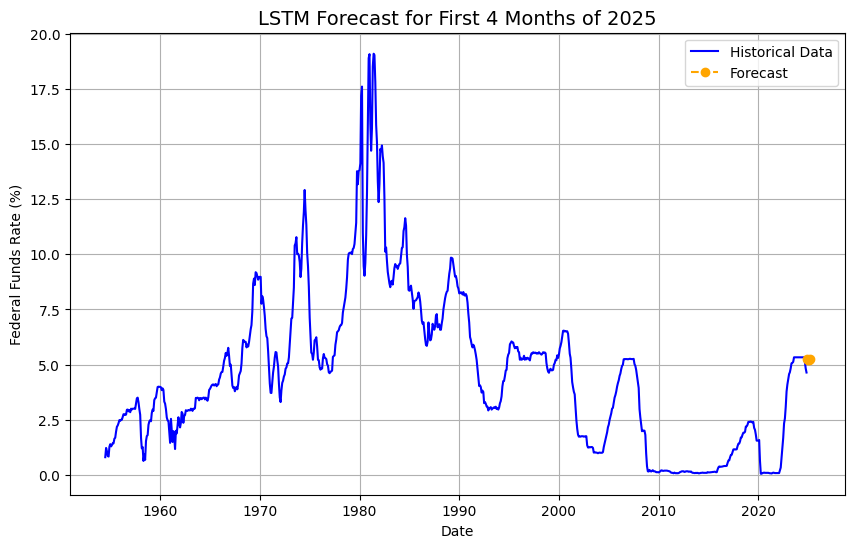

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd

# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['FEDFUNDS'].values.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# Set sequence length
sequence_length = 12  # 12 months
X, y = create_sequences(scaled_data, sequence_length)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Forecast the next 4 months
n_forecast = 4
last_sequence = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)
forecasts = []

for _ in range(n_forecast):
    # Predict next value
    forecast_scaled = model.predict(last_sequence)
    
    # Append the prediction to forecasts
    forecasts.append(forecast_scaled[0, 0])
    
    # Add the prediction to the sequence and remove the oldest value
    last_sequence = np.append(last_sequence[:, 1:, :], [[forecast_scaled[0]]], axis=1)

# Inverse transform the forecasts to original scale
forecasts = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

# Plot the forecast
forecast_dates = pd.date_range(start=data.index[-1], periods=n_forecast + 1, freq='MS')[1:]
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['FEDFUNDS'], label='Historical Data', color='blue')
plt.plot(forecast_dates, forecasts, label='Forecast', color='orange', linestyle='--', marker='o')
plt.title('LSTM Forecast for First 4 Months of 2025', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Federal Funds Rate (%)')
plt.legend()
plt.grid()
plt.show()


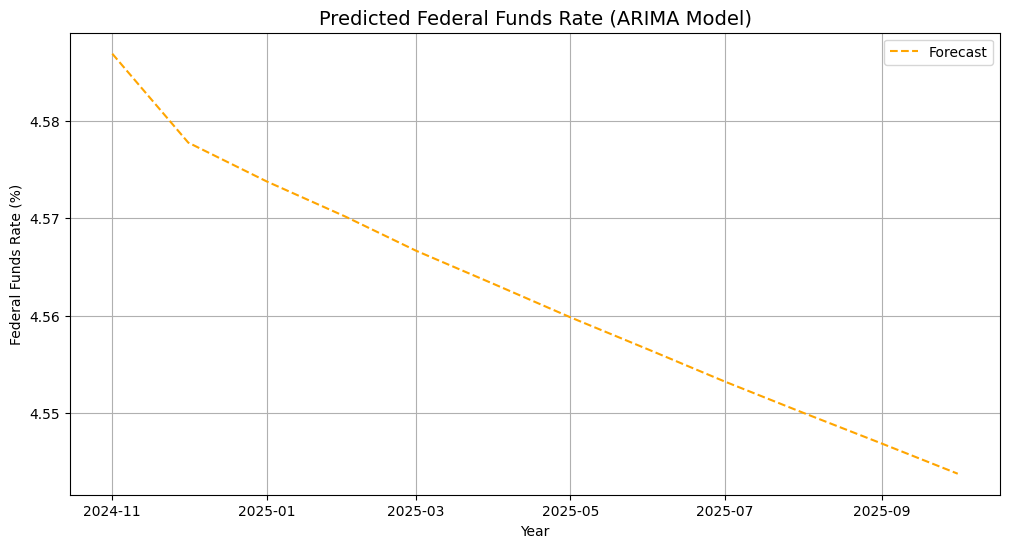

In [19]:
# Plot only the predicted forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_index, forecast_mean, label='Forecast', color='orange', linestyle='--')
plt.title('Predicted Federal Funds Rate (ARIMA Model)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Federal Funds Rate (%)')
plt.legend()
plt.grid()
plt.show()
